In [ ]:
from high_low_xuejieZuhui import *
from horizontal_area import *
import os
from test import *


os.chdir('/Users/kai/Desktop/qs/data_csv_distinct_0606')
for filename in os.listdir():
    # filename = '000001.SZ.csv'
    os.chdir('/Users/kai/Desktop/qs/data_csv_distinct_0606/_horizontal_area_pics')
    df = df_init(filename)
    peaks, valleys, high_points, low_points = find_high_low_xuejieZuhui(
        df, filename, save_data=False, draw_n_days=200, draw=False)

    max_len_of_window = 40
    min_len_of_window = 12
    gamma = 0.8  # price_change_50 >= gamma * max_change:
    view_coe = 0.8  # 视野·系数

    result = find_horizontal_area1(df, high_points, low_points, max_len_of_window,
                                min_len_of_window, gamma, view_coe, ignore_hl=True)

    n_days = 300
    draw_horizontal_area(df, result, peaks, valleys, high_points,
                        low_points, filename, n_days, print_result=False, show_plot=False)
                        
    os.chdir('/Users/kai/Desktop/qs/data_csv_distinct_0606')


In [31]:
from high_low_xuejieZuhui import *
from horizontal_area import *
import os
from test import *

/Users/kai/Desktop/qs/data_csv_distinct_0606/300153.SZ.csv
当前参数组合: max_len_of_window = 100, min_len_of_window = 65, gamma = 0.3


100%|██████████| 3022/3022 [00:12<00:00, 243.86it/s]


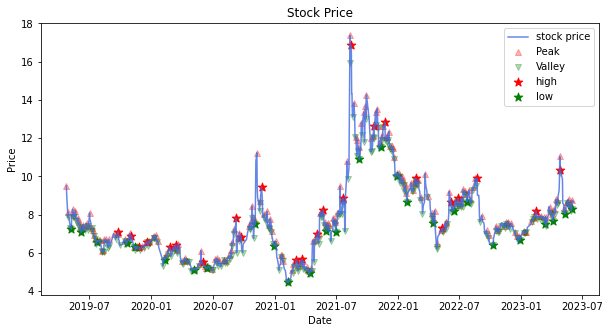

(1, 105)

In [52]:
# filename = '688699.SH.csv'
filename = '300153.SZ.csv'
df = df_init(filename)
peaks, valleys, high_points, low_points = find_high_low_xuejieZuhui(
    df, filename, save_data=False, draw_n_days=200, draw=False)

min_len_of_window = 65
max_len_of_window = 100
gamma = 0.3  # price_change_50 >= gamma * max_change:
view_coe = 0.8  # 视野·系数

result = find_horizontal_area(df, high_points, low_points, max_len_of_window,
                            min_len_of_window, gamma, view_coe, ignore_hl=True)

n_days = 1000
draw_horizontal_area(df, result, peaks, valleys, high_points,
                    low_points, filename, n_days, print_result=True, show_plot=True)

In [ ]:
n_days = 400
draw_horizontal_area(df, result, peaks, valleys, high_points,
                    low_points, filename, n_days, print_result=False, show_plot=True)

In [54]:
import pandas as pd
df = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/_horizontal_area_pics/results.csv')

In [57]:
df.columns = ['min_len_of_window', 'max_len_of_window', 'n', 'mean']
df.dropna(inplace=True)
for mins in (6,12,18):
    temp = df[(df['min_len_of_window']==mins)]
    print(mins, round(temp['mean'].dot(temp['n'])/temp['n'].sum(), 2))

6 19.26
12 30.32
18 41.54


In [66]:
dfl = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/_horizontal_area_pics/results_long.csv')
dfl.columns = ['code', 'min_len_of_window', 'max_len_of_window', 'n', 'mean']
dfl.dropna(inplace=True)
print(round(dfl['mean'].dot(dfl['n'])/dfl['n'].sum(), 2))

122.02


In [49]:
dfl = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/_horizontal_area_pics/results_long.csv')
a = dfl.iloc[1:2,:]['3']
b = a.values[0]
pd.isna(b)

True

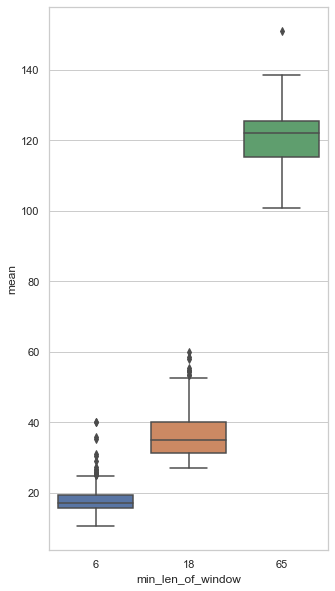

In [71]:
data_short = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/_horizontal_area_pics/results_short.csv')
data_short.columns = ['min_len_of_window', 'n', 'mean']
data_short.dropna(inplace=True)
data_long = pd.read_csv('/Users/kai/Desktop/qs/data_csv_distinct_0606/_horizontal_area_pics/results_long.csv')
data_long.columns = ['code', 'min_len_of_window', 'max_len_of_window', 'n', 'mean']
data_long = data_long[['min_len_of_window', 'n', 'mean']]
data_long.dropna(inplace=True)
# merge两个dataframe
data = pd.concat([data_short, data_long], axis=0)
# 对mean这一列画出min_len_of_window=6,18,65三种情况下的boxplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 10]
sns.boxplot(x='min_len_of_window', y='mean', data=data)
plt.show()